## 데이터 준비하기

In [ ]:
# 라이브러리
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 파일 불러오기
orig_df = pd.read_csv('C:/Users/User/Downloads/12 머신러닝/팀플/data/Measurement_summary.csv')
orig_df.head()

## EDA

In [2]:
# 자료형 확인
orig_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 647511 entries, 0 to 647510
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Measurement date  647511 non-null  object 
 1   Station code      647511 non-null  int64  
 2   Address           647511 non-null  object 
 3   Latitude          647511 non-null  float64
 4   Longitude         647511 non-null  float64
 5   SO2               647511 non-null  float64
 6   NO2               647511 non-null  float64
 7   O3                647511 non-null  float64
 8   CO                647511 non-null  float64
 9   PM10              647511 non-null  int64  
 10  PM2.5             647511 non-null  int64  
dtypes: float64(6), int64(3), object(2)
memory usage: 54.3+ MB


In [3]:
# 1. 결측치 확인
print(orig_df.isnull().values.any())
orig_df.describe()

False


,Station code,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5
count,647511.000000,647511.000000,647511.000000,647511.000000,647511.000000,647511.000000,647511.000000,647511.000000,647511.000000
mean,113.000221,37.553484,126.989340,-0.001795,0.022519,0.017979,0.509197,43.708051,25.411995
std,7.211315,0.053273,0.078790,0.078832,0.115153,0.099308,0.405319,71.137342,43.924595
min,101.000000,37.452357,126.835151,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,107.000000,37.517528,126.927102,0.003000,0.016000,0.008000,0.300000,22.000000,11.000000
50%,113.000000,37.544962,127.004850,0.004000,0.025000,0.021000,0.500000,35.000000,19.000000
75%,119.000000,37.584848,127.047470,0.005000,0.038000,0.034000,0.600000,53.000000,31.000000
max,125.000000,37.658774,127.136792,3.736000,38.445000,33.600000,71.700000,3586.000000,6256.000000


<AxesSubplot:>

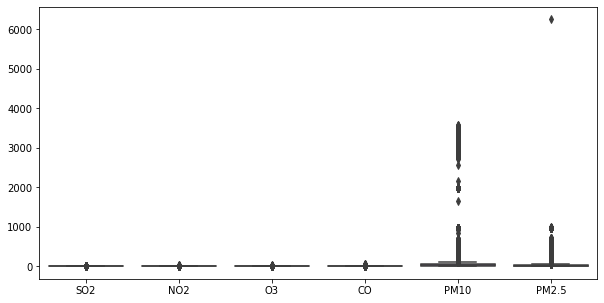

In [4]:
# 2. 이상치 확인
prod = orig_df.iloc[:,5:]
plt.figure(figsize=(10,5))
sns.boxplot(data=prod)

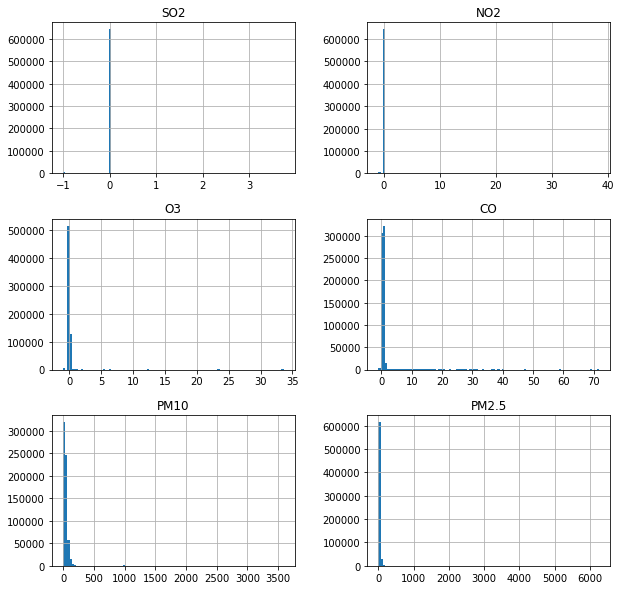

In [5]:
# 3. 성분 분포도
prod = orig_df.iloc[:,5:]
prod.hist(figsize=(10,10), bins=100);

<AxesSubplot:>

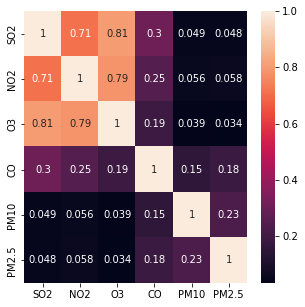

In [6]:
# 4. 성분 간 상관관계
plt.figure(figsize=(5,5))
sns.heatmap(prod.corr(), annot= True)

In [7]:
# 5. 성분 간 공분산
prod.cov()

,SO2,NO2,O3,CO,PM10,PM2.5
SO2,0.006215,0.006467,0.006306,0.009743,0.272395,0.164585
NO2,0.006467,0.013260,0.008986,0.011470,0.454902,0.292577
O3,0.006306,0.008986,0.009862,0.007607,0.272707,0.147736
CO,0.009743,0.011470,0.007607,0.164283,4.358619,3.255661
PM10,0.272395,0.454902,0.272707,4.358619,5060.521416,715.500215
PM2.5,0.164585,0.292577,0.147736,3.255661,715.500215,1929.370065


C:\Users\User\anaconda3\envs\pycaret\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\User\anaconda3\envs\pycaret\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


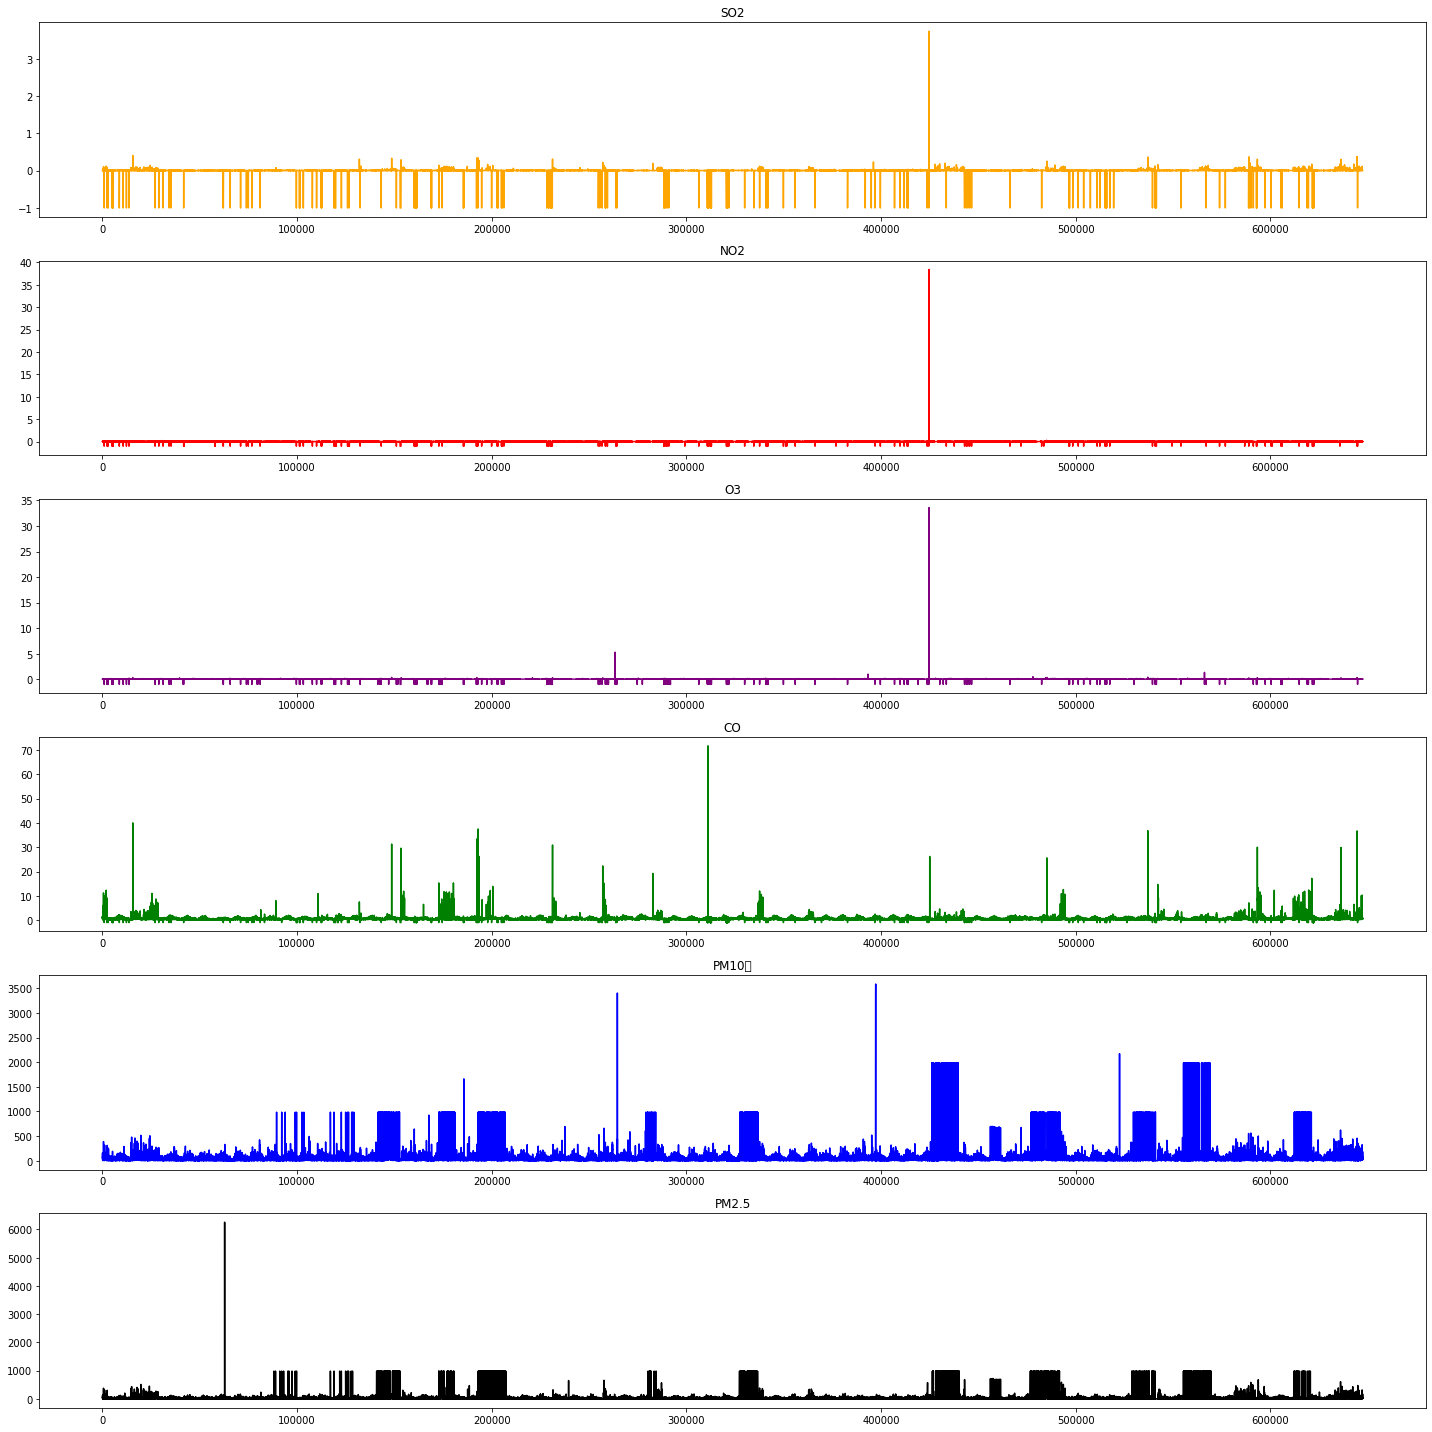

In [8]:
# 6. 시기 별 성분값
plt.figure(figsize=(20,20))

plt.subplot(6, 1, 1)
orig_df['SO2'].plot( color='orange' , title='SO2')

plt.subplot(6, 1, 2)
orig_df['NO2'].plot(color='red' , title="NO2")

plt.subplot(6, 1, 3)
orig_df['O3'].plot(color='purple' , title="O3")

plt.subplot(6, 1, 4)
orig_df['CO'].plot(color='green' , title="CO")

plt.subplot(6, 1, 5)
orig_df['PM10'].plot(color='blue' , title="PM10	")

plt.subplot(6, 1, 6)
orig_df['PM2.5'].plot(color='black' , title="PM2.5")

plt.tight_layout()

+ 전처리 전 EDA 코드와 함께

### 정리

1. 결측치는 존재하지 않음
2. SO2, NO2, O3, CO, PM10, PM2.5 농도값에서 -1과 같은 이상치 존재
=> 특히 PM10, PM2.5의 이상치가 대량으로 존재
3. 이상치로 인하여 6가지 성분이 정상적인 분포를 보이지 않음


4. 전체적으로 양의 상관관계를 보이며, 특히 SO2-O3, NO2-O3의 상관관계가 가장 큼
5. PM10-PM2.5의 공분산이 현저히 큼
6. 특정 일자에 이상치가 존재하는 것이 보임


## 전처리
### 자료형 변환

In [9]:
orig_df = orig_df.astype({'PM10':float, 'PM2.5':float})
orig_df.describe()

,Station code,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5
count,647511.000000,647511.000000,647511.000000,647511.000000,647511.000000,647511.000000,647511.000000,647511.000000,647511.000000
mean,113.000221,37.553484,126.989340,-0.001795,0.022519,0.017979,0.509197,43.708051,25.411995
std,7.211315,0.053273,0.078790,0.078832,0.115153,0.099308,0.405319,71.137342,43.924595
min,101.000000,37.452357,126.835151,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,107.000000,37.517528,126.927102,0.003000,0.016000,0.008000,0.300000,22.000000,11.000000
50%,113.000000,37.544962,127.004850,0.004000,0.025000,0.021000,0.500000,35.000000,19.000000
75%,119.000000,37.584848,127.047470,0.005000,0.038000,0.034000,0.600000,53.000000,31.000000
max,125.000000,37.658774,127.136792,3.736000,38.445000,33.600000,71.700000,3586.000000,6256.000000


In [10]:
df = orig_df

### 이상치 제거 (1)

In [11]:
# 특정 이상치를 가진 인덱스만 추출하여 해당 인덱스 자료를 삭제
cond1 = df[df.iloc[:,4] == -1].index
df.drop(cond1, inplace=True)

cond2 = df[df.iloc[:,5] == -1].index
df.drop(cond2, inplace=True)

cond3 = df[df.iloc[:,6] == -1].index
df.drop(cond3, inplace=True)

cond4 = df[df.iloc[:,7] == -1].index
df.drop(cond4, inplace=True)

cond5 = df[df.iloc[:,8] == -1].index
df.drop(cond5, inplace=True)

cond6 = df[df.iloc[:,9] == -1].index
df.drop(cond6, inplace=True)

df

,Measurement date,Station code,Address,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5
0,2017-01-01 0:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.059,0.002,1.2,73.0,57.0
1,2017-01-01 1:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.058,0.002,1.2,71.0,59.0
2,2017-01-01 2:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.056,0.002,1.2,70.0,59.0
3,2017-01-01 3:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.056,0.002,1.2,70.0,58.0
4,2017-01-01 4:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.003,0.051,0.002,1.2,69.0,61.0
...,...,...,...,...,...,...,...,...,...,...,...
647506,2019-12-31 19:00,125,"59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...",37.544962,127.136792,0.003,0.028,0.013,0.5,23.0,17.0
647507,2019-12-31 20:00,125,"59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...",37.544962,127.136792,0.003,0.025,0.015,0.4,25.0,19.0
647508,2019-12-31 21:00,125,"59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...",37.544962,127.136792,0.003,0.023,0.015,0.4,24.0,17.0
647509,2019-12-31 22:00,125,"59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...",37.544962,127.136792,0.003,0.040,0.004,0.5,25.0,18.0


In [12]:
# 인덱스 재정렬
df.reset_index(drop=True, inplace=True)
df

,Measurement date,Station code,Address,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5
0,2017-01-01 0:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.059,0.002,1.2,73.0,57.0
1,2017-01-01 1:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.058,0.002,1.2,71.0,59.0
2,2017-01-01 2:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.056,0.002,1.2,70.0,59.0
3,2017-01-01 3:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.056,0.002,1.2,70.0,58.0
4,2017-01-01 4:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.003,0.051,0.002,1.2,69.0,61.0
...,...,...,...,...,...,...,...,...,...,...,...
642666,2019-12-31 19:00,125,"59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...",37.544962,127.136792,0.003,0.028,0.013,0.5,23.0,17.0
642667,2019-12-31 20:00,125,"59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...",37.544962,127.136792,0.003,0.025,0.015,0.4,25.0,19.0
642668,2019-12-31 21:00,125,"59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...",37.544962,127.136792,0.003,0.023,0.015,0.4,24.0,17.0
642669,2019-12-31 22:00,125,"59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...",37.544962,127.136792,0.003,0.040,0.004,0.5,25.0,18.0


In [13]:
# 한 관측소만 선정하여 데이터셋 축소
df = df[df['Station code'] == 101 ]
df

,Measurement date,Station code,Address,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5
0,2017-01-01 0:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.059,0.002,1.2,73.0,57.0
1,2017-01-01 1:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.058,0.002,1.2,71.0,59.0
2,2017-01-01 2:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.056,0.002,1.2,70.0,59.0
3,2017-01-01 3:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.056,0.002,1.2,70.0,58.0
4,2017-01-01 4:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.003,0.051,0.002,1.2,69.0,61.0
...,...,...,...,...,...,...,...,...,...,...,...
25870,2019-12-31 19:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.003,0.026,0.014,0.5,26.0,19.0
25871,2019-12-31 20:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.003,0.024,0.014,0.4,27.0,19.0
25872,2019-12-31 21:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.003,0.014,0.021,0.4,23.0,18.0
25873,2019-12-31 22:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.003,0.022,0.014,0.5,20.0,19.0


### 이상치 제거 (2)

In [14]:
# 이상치 제거 함수
def outlier_iqr(df):
    q1, q3 = np.percentile(df, [25,75])
    iqr = q3-q1
    lower_bound = q1 - (iqr*1.5)
    upper_bound = q3 + (iqr*1.5)

    return np.where((df > upper_bound)|(df < lower_bound))

In [15]:
# 이상치 함수 적용
SO2_outlier_index = outlier_iqr(df['SO2'])[0]
NO2_outlier_index = outlier_iqr(df['NO2'])[0]
O3_outlier_index = outlier_iqr(df['O3'])[0]
CO_outlier_index = outlier_iqr(df['CO'])[0]
PM10_outlier_index = outlier_iqr(df['PM10'])[0]
PM25_outlier_index = outlier_iqr(df['PM2.5'])[0]

In [16]:
lead_outlier_index = np.concatenate((SO2_outlier_index, NO2_outlier_index, O3_outlier_index, CO_outlier_index, PM10_outlier_index, PM25_outlier_index), axis=None)
print("이상치 개수: ", len(lead_outlier_index))
# lead_outlier_index

이상치 개수:  4835


In [17]:
# 정상값만 출력
lead_noutlier_index = []

for i in df.index :
    if i not in lead_outlier_index :
        lead_noutlier_index.append(i)

clean_df = df.loc[lead_noutlier_index]
clean_df = clean_df.reset_index(drop=True)
clean_df

,Measurement date,Station code,Address,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5
0,2017-01-02 11:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.005,0.055,0.008,0.8,73.0,55.0
1,2017-01-03 7:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.057,0.003,1.0,72.0,51.0
2,2017-01-03 11:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.006,0.052,0.011,0.9,75.0,53.0
3,2017-01-03 12:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.006,0.052,0.016,0.8,75.0,53.0
4,2017-01-03 13:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.006,0.056,0.013,0.8,71.0,48.0
...,...,...,...,...,...,...,...,...,...,...,...
22901,2019-12-31 19:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.003,0.026,0.014,0.5,26.0,19.0
22902,2019-12-31 20:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.003,0.024,0.014,0.4,27.0,19.0
22903,2019-12-31 21:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.003,0.014,0.021,0.4,23.0,18.0
22904,2019-12-31 22:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.003,0.022,0.014,0.5,20.0,19.0


<AxesSubplot:>

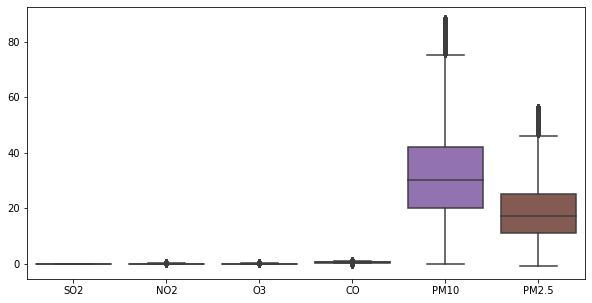

In [18]:
# 박스플롯
prod = clean_df.iloc[:,5:]
plt.figure(figsize=(10,5))
sns.boxplot(data=prod)

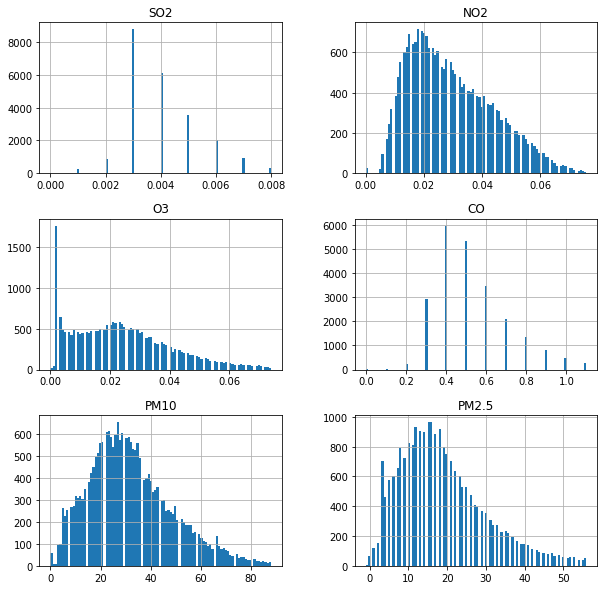

In [19]:
# 성분 분포도
prod.hist(figsize=(10,10), bins=100);

<AxesSubplot:>

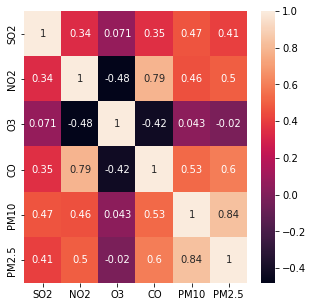

In [20]:
# 성분 간 상관관계
plt.figure(figsize=(5,5))
sns.heatmap(prod.corr(), annot= True)

In [21]:
# 성분 간 공분산
prod.cov()

,SO2,NO2,O3,CO,PM10,PM2.5
SO2,0.000002,0.000006,0.000002,0.000086,0.010307,0.006051
NO2,0.000006,0.000210,-0.000114,0.002108,0.110659,0.080904
O3,0.000002,-0.000114,0.000267,-0.001261,0.011600,-0.003597
CO,0.000086,0.002108,-0.001261,0.033764,1.631040,1.224476
PM10,0.010307,0.110659,0.011600,1.631040,277.360872,155.499539
PM2.5,0.006051,0.080904,-0.003597,1.224476,155.499539,124.894903


C:\Users\User\anaconda3\envs\pycaret\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\User\anaconda3\envs\pycaret\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


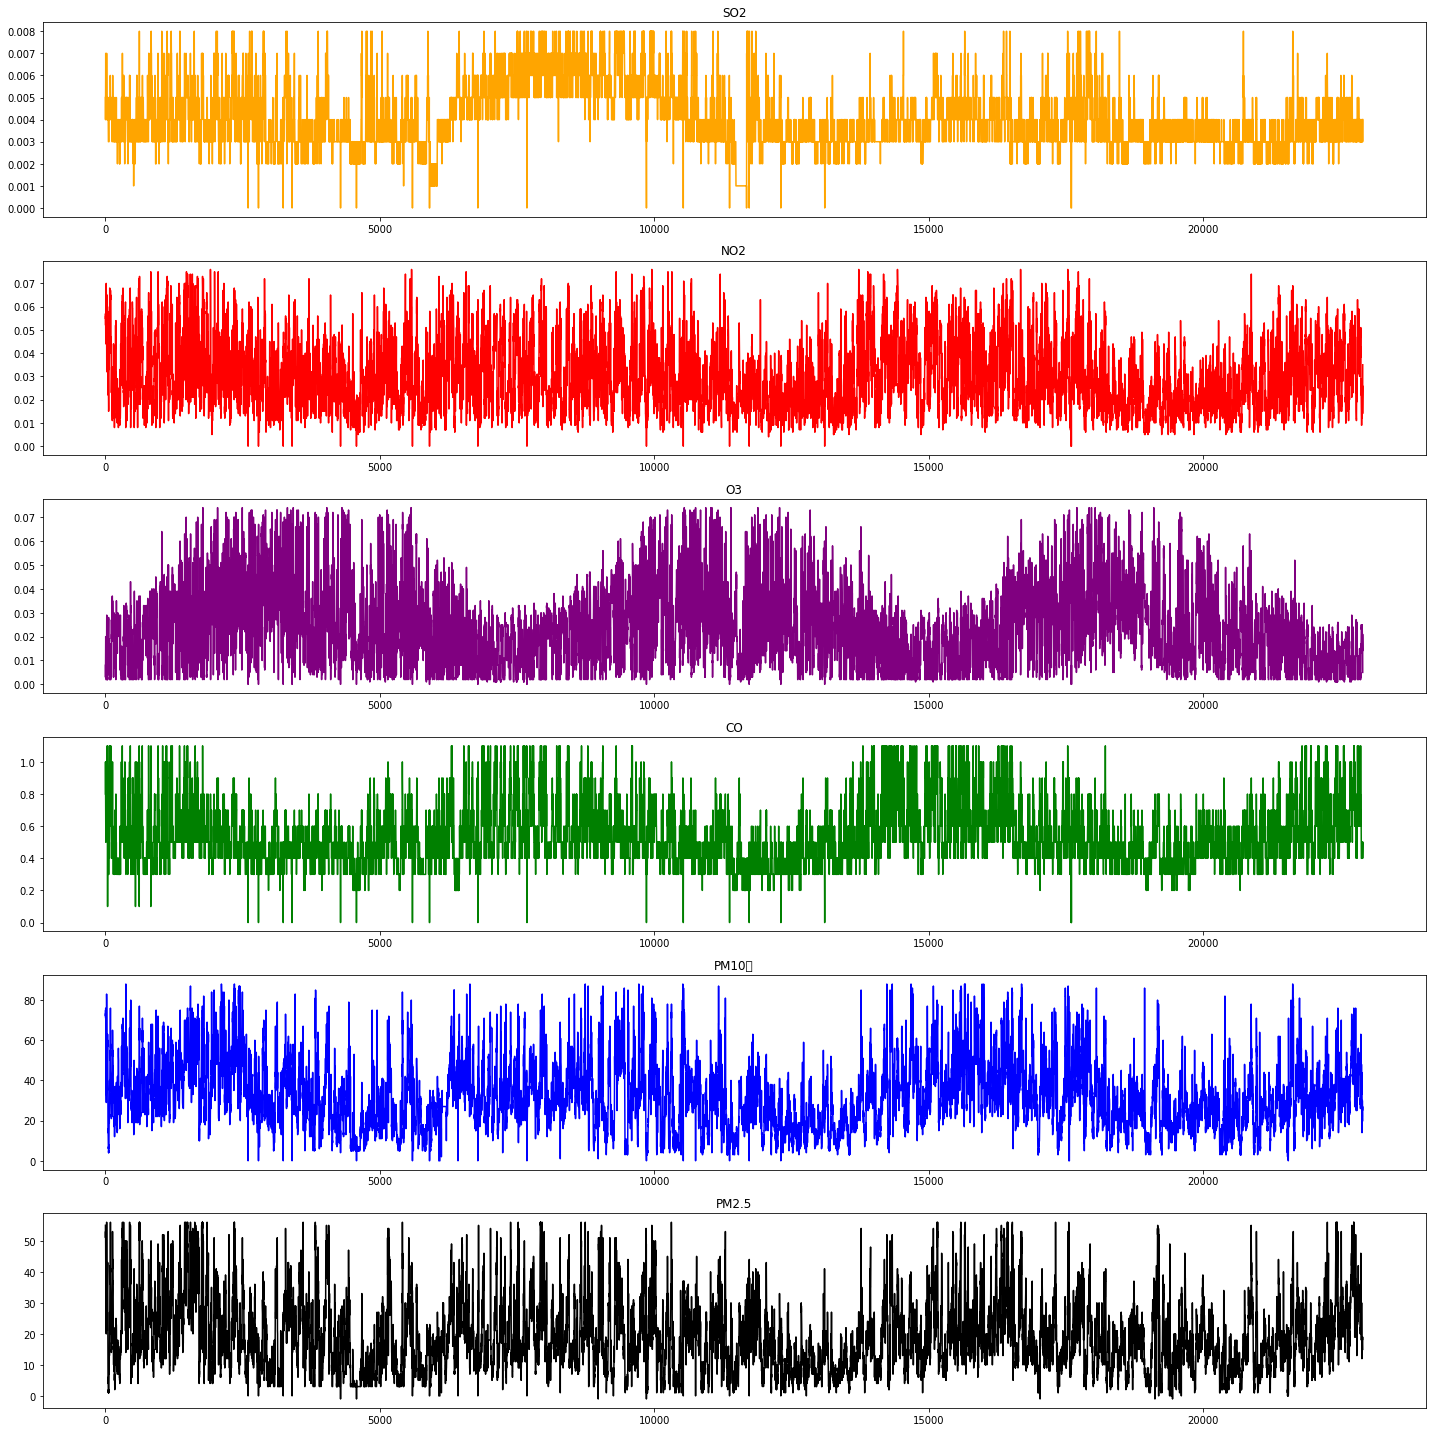

In [22]:
# 시기 별 성분값
plt.figure(figsize=(20,20))

plt.subplot(6, 1, 1)
clean_df['SO2'].plot( color='orange' , title='SO2')

plt.subplot(6, 1, 2)
clean_df['NO2'].plot(color='red' , title="NO2")

plt.subplot(6, 1, 3)
clean_df['O3'].plot(color='purple' , title="O3")

plt.subplot(6, 1, 4)
clean_df['CO'].plot(color='green' , title="CO")

plt.subplot(6, 1, 5)
clean_df['PM10'].plot(color='blue' , title="PM10	")

plt.subplot(6, 1, 6)
clean_df['PM2.5'].plot(color='black' , title="PM2.5")

plt.tight_layout()

In [23]:
# 정제된 데이터 내보내기
clean_df.to_csv('./clean_air_pollution.csv')

+ 전처리 후 EDA 코드도 함께

### 정리

1. 데이터전처리를 통해 데이터셋이 647511개 -> 642519개로 감소
=> PM10, PM2.5 컬럼에서 이상치가 대량으로 존재
=> 이후 101번 측정기만 채택함
2. 101번 측정기에서 측정한 25905개의 기록 중 측정기의 상태가 비정상으로 나타나는 데이터와  Q1~Q3 범위 외의 값 총 4835개의 데이터는 이상치로 간주하고 삭제함
3. 모든 성분들이 대체적으로 양의 상관관계를 보이나, PM2.5는 O3와 0에 가까운 음의 상관관계를 보임
=> SO2-O3, SO2-NO2 간 상관성이 가장 큼
=> PM10-PM2.5 간의 공분산이 눈에 띄게 큼
4.  대체적으로 8~9월 경에 수치가 낮으며, O3는 1월경에 가장 낮은 수치를 보임
=> PM10와 PM2.5는 비슷한 패턴을 보임

In [24]:
clean_df.describe()

,Station code,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5
count,22906.0,22906.000000,2.290600e+04,22906.000000,22906.000000,22906.000000,22906.000000,22906.000000,22906.000000
mean,101.0,37.572016,1.270050e+02,0.004013,0.029400,0.024010,0.527739,32.013577,18.759015
std,0.0,0.000000,2.842233e-14,0.001320,0.014497,0.016349,0.183751,16.654155,11.175639
min,101.0,37.572016,1.270050e+02,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
25%,101.0,37.572016,1.270050e+02,0.003000,0.018000,0.011000,0.400000,20.000000,11.000000
50%,101.0,37.572016,1.270050e+02,0.004000,0.027000,0.022000,0.500000,30.000000,17.000000
75%,101.0,37.572016,1.270050e+02,0.005000,0.039000,0.034000,0.600000,42.000000,25.000000
max,101.0,37.572016,1.270050e+02,0.008000,0.076000,0.074000,1.100000,88.000000,56.000000


In [25]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22906 entries, 0 to 22905
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Measurement date  22906 non-null  object 
 1   Station code      22906 non-null  int64  
 2   Address           22906 non-null  object 
 3   Latitude          22906 non-null  float64
 4   Longitude         22906 non-null  float64
 5   SO2               22906 non-null  float64
 6   NO2               22906 non-null  float64
 7   O3                22906 non-null  float64
 8   CO                22906 non-null  float64
 9   PM10              22906 non-null  float64
 10  PM2.5             22906 non-null  float64
dtypes: float64(8), int64(1), object(2)
memory usage: 1.9+ MB


## 모델 학습

In [26]:
data = clean_df.copy()

In [27]:
data = data.drop(['Station code','Latitude','Longitude','Address'], axis=1)

In [28]:
data['year'] = np.NaN
data['month'] = np.NaN
data['day'] = np.NaN
data['hour'] = np.NaN

In [29]:
data.columns = ['Measurement date','PM10','PM2.5','SO2','NO2','O3','CO','year','month','day','hour']
data = data[['Measurement date','year','month','day','hour','SO2','NO2','O3','CO','PM10','PM2.5']]

In [30]:
for i in range(data.shape[0]):
    data.loc[i,'year'] = str(data.loc[i,'Measurement date']).split('-')[0]
    data.loc[i,'month'] = str(data.loc[i,'Measurement date']).split('-')[1]
    data.loc[i,'day'] = str(data.loc[i,'Measurement date']).split('-')[2]
    data.loc[i,'hour'] = str(data.loc[i,'Measurement date']).split(' ')[1]

In [31]:
for i in range(data.shape[0]):
    data.loc[i,'day'] = str(data.loc[i,'day']).split(' ')[0]
    data.loc[i,'hour'] = str(data.loc[i,'hour']).split(':')[0]

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22906 entries, 0 to 22905
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Measurement date  22906 non-null  object 
 1   year              22906 non-null  object 
 2   month             22906 non-null  object 
 3   day               22906 non-null  object 
 4   hour              22906 non-null  object 
 5   SO2               22906 non-null  float64
 6   NO2               22906 non-null  float64
 7   O3                22906 non-null  float64
 8   CO                22906 non-null  float64
 9   PM10              22906 non-null  float64
 10  PM2.5             22906 non-null  float64
dtypes: float64(6), object(5)
memory usage: 1.9+ MB


In [33]:
data['year'] = data['year'].astype(int)
data['month'] = data['month'].astype(int)
data['day'] = data['day'].astype(int)
data['hour'] = data['hour'].astype(int)

In [34]:
data['Measurement date'] = data['Measurement date'].str[:11]

### 데이터 세트 나누기

In [35]:
train = data.sample(frac=0.8, random_state=100)
test = data.drop(train.index)

### 학습용 세트 파악

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10'),
  Text(10, 0, '11'),
  Text(11, 0, '12')])

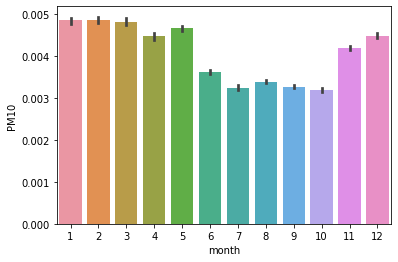

In [36]:
# 월별 미세먼지 평균 현황
graph_month = sns.barplot(x ="month", y ="PM10", data = train)
plt.xticks(rotation=0)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23')])

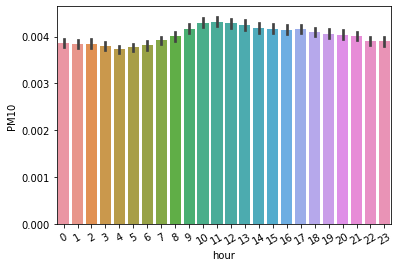

In [37]:
# 시간별 미세먼지 평균
df_sorted_desc= train.sort_values('hour',ascending=False)
graph_hour = sns.barplot(x = 'hour', y = 'PM10', data = df_sorted_desc)
plt.xticks(rotation=30)

In [38]:
# 변수 별 상관관계
corr = train.corr()

In [39]:
corr['PM10'].sort_values(ascending=False)

PM10     1.000000
O3       0.465610
CO       0.408612
NO2      0.355356
PM2.5    0.339225
SO2      0.068472
hour     0.058044
day      0.017908
year    -0.126016
month   -0.276632
Name: PM10, dtype: float64

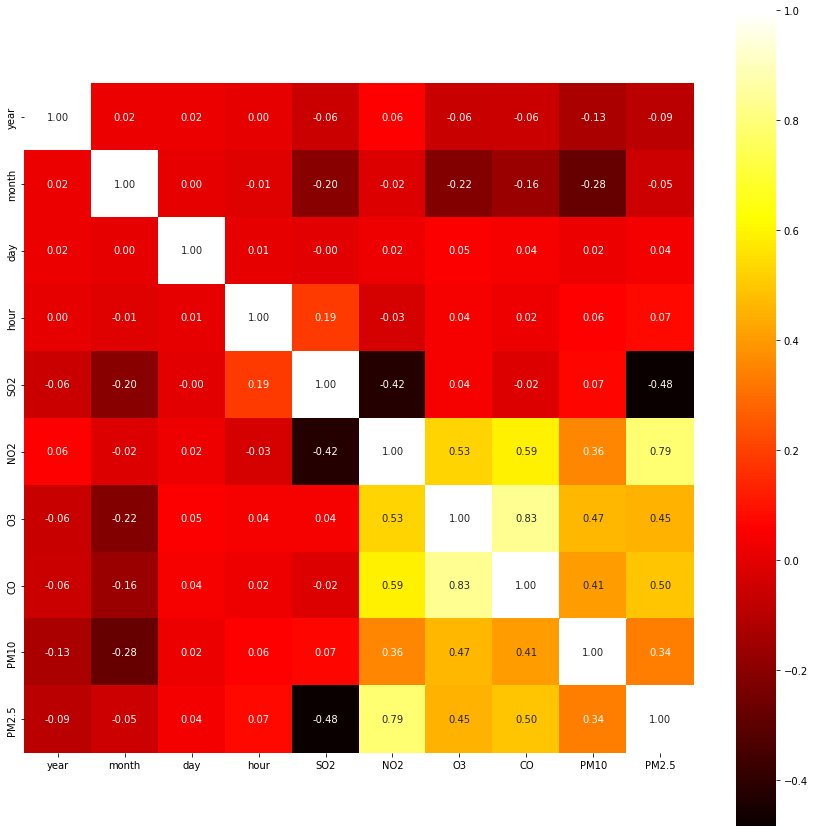

In [40]:
# 각 변수 간 상관성
plt.figure(figsize=(15,15))
df_heatmap = sns.heatmap(corr, cbar = True, annot = True, annot_kws={'size' : 10}, fmt='.2f', square=True, cmap='hot')

### 기계학습

In [41]:
from numpy import array
from numpy import hstack

%config InlineBackend.figure_format = 'retina'

from keras.models import Sequential
from keras.layers import Dense, LSTM

In [42]:
pm10 = array(train['PM10'])
pm25 = array(train['PM2.5'])

In [43]:
# 난수 seed 생성
np.random.seed(777)

In [44]:
steps = 5
features = 1

def split_sequence(sequence, steps):
    x,y = list(), list()
    for i in range(len(sequence)):
        end_index = i + steps
        if end_index > len(sequence)-1:
            break
        seq_x, seq_y = sequence[i:end_index], sequence[end_index]
        x.append(seq_x)
        y.append(seq_y)
    return array(x), array(y)


In [45]:
x_pm10, y_pm10 = split_sequence(pm10, steps)
print(x_pm10.shape, y_pm10.shape)

(18320, 5) (18320,)


In [46]:
x_pm25, y_pm25 = split_sequence(pm25, steps)
print(x_pm25.shape, y_pm25.shape)

(18320, 5) (18320,)


In [47]:
# 재배열
x_pm10 = x_pm10.reshape((x_pm10.shape[0], x_pm10.shape[1], features))
x_pm25 = x_pm25.reshape((x_pm25.shape[0], x_pm25.shape[1], features))

In [48]:
model = Sequential()
model.add(LSTM(300, activation='relu', input_shape=(steps, features)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')
histogram = model.fit(x_pm10, y_pm10, epochs=50, batch_size=100, verbose=1) # 파라미터 지정

Epoch 1/50
184/184 [==============================] - 5s 22ms/step - loss: 2.0421e-06
Epoch 2/50
184/184 [==============================] - 4s 20ms/step - loss: 1.9302e-06
Epoch 3/50
184/184 [==============================] - 4s 21ms/step - loss: 1.9285e-06
Epoch 4/50
184/184 [==============================] - 4s 20ms/step - loss: 1.8864e-06
Epoch 5/50
184/184 [==============================] - 4s 21ms/step - loss: 1.8554e-06
Epoch 6/50
184/184 [==============================] - 4s 20ms/step - loss: 1.8182e-06
Epoch 7/50
184/184 [==============================] - 4s 19ms/step - loss: 1.8156e-06
Epoch 8/50
184/184 [==============================] - 4s 20ms/step - loss: 1.8050e-06
Epoch 9/50
184/184 [==============================] - 4s 20ms/step - loss: 1.8478e-06
Epoch 10/50
184/184 [==============================] - 4s 20ms/step - loss: 1.7995e-06
Epoch 11/50
184/184 [==============================] - 4s 19ms/step - loss: 1.8116e-06
Epoch 12/50
184/184 [==============================]

### 시험 데이터

In [49]:
test.head()

,Measurement date,year,month,day,hour,SO2,NO2,O3,CO,PM10,PM2.5
9,2017-01-03,2017,1,3,18,0.002,0.7,38.0,21.0,0.004,0.062
17,2017-01-04,2017,1,4,3,0.002,0.9,34.0,21.0,0.005,0.063
27,2017-01-04,2017,1,4,18,0.014,0.8,58.0,37.0,0.005,0.047
28,2017-01-04,2017,1,4,19,0.011,0.8,57.0,41.0,0.005,0.048
39,2017-01-05,2017,1,5,6,0.002,0.1,63.0,43.0,0.005,0.053


In [50]:
test_pm10 = array(test['PM10'])
x_test, y_test = split_sequence(test_pm10, steps)

In [51]:
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], features))
y_hat_test = model.predict(x_test)

### 예측 모델 출력

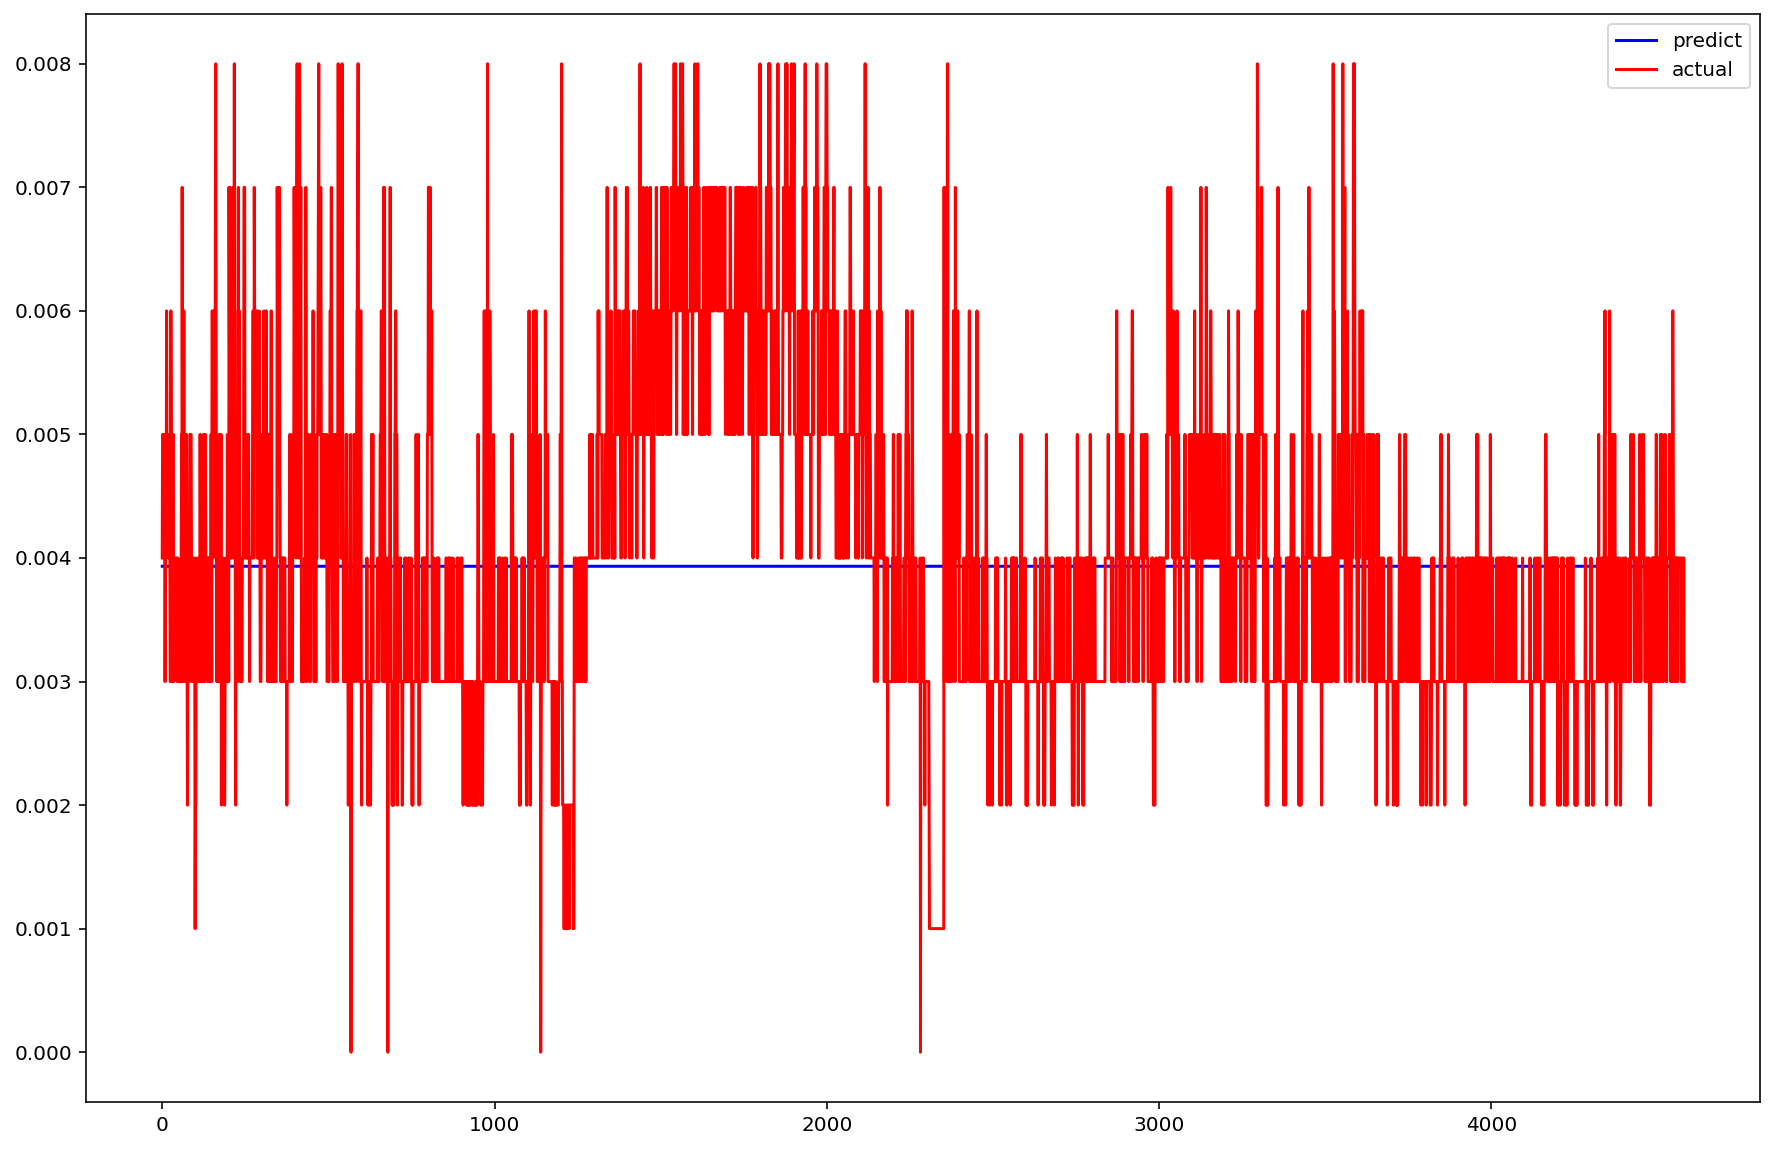

In [52]:
plt.figure(figsize=(15,10))
plt.plot(y_hat_test, color='blue') # 예측값
plt.plot(test_pm10, color='red') # 실제값
plt.legend(['predict','actual'], loc='upper right', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()